In [2]:
!python -m wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv


Saved under data.csv


In [55]:
from sklearn.feature_extraction import DictVectorizer

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import mutual_info_score
from sklearn.feature_extraction import DictVectorizer
# from sklearn.feature_extraction.dict_vectorizer import DictVectorizer
# from sklearn_contrib.feature_extraction.dict_vectorizer import DictVectorizer
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline
     
from sklearn.model_selection import train_test_split
data=pd.read_csv('data.csv')
data.head(5)


,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [4]:
from sklearn.feature_extraction import DictVectorizer


In [5]:
data.columns

Index(['Make', 'Model', 'Year', 'Engine Fuel Type', 'Engine HP',
       'Engine Cylinders', 'Transmission Type', 'Driven_Wheels',
       'Number of Doors', 'Market Category', 'Vehicle Size', 'Vehicle Style',
       'highway MPG', 'city mpg', 'Popularity', 'MSRP'],
      dtype='object')

In [6]:
#  Take the subset of data with the following columns ['make', 'model', 'year', 'engine_hp', 'engine_cylinders', 'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg', 'msrp']:
cols=['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders', 'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg', 'MSRP']
data=data[cols]

In [7]:
data.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Vehicle Style,highway MPG,city mpg,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500


In [8]:
# columns in data:
data.columns


Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [9]:
data.columns = data.columns.str.replace(' ', '_').str.lower()

In [10]:
# print the columns in data:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [11]:
# Fill in the missing values of the selected features with 0:
data=data.fillna(0)
# Rename MSRP variable to price.
data=data.rename(columns={'msrp':'price'})


In [13]:
data.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

In [10]:
# calculate mode
data['transmission_type'].mode()


0    AUTOMATIC
Name: transmission_type, dtype: object

In [15]:
#@ PROCESSING DATASET:
data_class = data.copy()
mean = data_class['price'].mean()

data_class['above_average'] = np.where(data_class['price']>=mean,1,0)

In [37]:
# abpve_average where value is 0 and 1:
data_class['above_average'].value_counts()


0    8645
1    3269
Name: above_average, dtype: int64

In [16]:
data_class = data_class.drop('price', axis=1)


In [18]:
# Split your data in train/val/test sets with 60%/20%/20% distribution.
df_train_full, df_test = train_test_split(data_class, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_train_full, test_size=0.2, random_state=1)
# Use Scikit-Learn for that (the train_test_split function) and set the seed to 42.
# Make sure that the target value (above_average) is not in your dataframe.

In [20]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
7272,Lexus,NX 200t,2015,235.0,4.0,AUTOMATIC,4dr SUV,28,21,0
4778,Ford,Focus ST,2016,252.0,4.0,MANUAL,4dr Hatchback,31,22,0
9205,Toyota,Sienna,2015,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
7117,Mazda,MX-5 Miata,2015,167.0,4.0,MANUAL,Convertible,28,21,0
5150,Infiniti,G37 Coupe,2010,330.0,6.0,AUTOMATIC,Coupe,27,19,0


In [21]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [22]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Lexus,NX 200t,2015,235.0,4.0,AUTOMATIC,4dr SUV,28,21,0
1,Ford,Focus ST,2016,252.0,4.0,MANUAL,4dr Hatchback,31,22,0
2,Toyota,Sienna,2015,266.0,6.0,AUTOMATIC,Passenger Minivan,25,18,0
3,Mazda,MX-5 Miata,2015,167.0,4.0,MANUAL,Convertible,28,21,0
4,Infiniti,G37 Coupe,2010,330.0,6.0,AUTOMATIC,Coupe,27,19,0


In [23]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [24]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold

%matplotlib inline
     

In [25]:
# extract the numeric features:
numerical=df_train.select_dtypes(include=[np.number])
numerical.head()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average
0,2015,235.0,4.0,28,21,0
1,2016,252.0,4.0,31,22,0
2,2015,266.0,6.0,25,18,0
3,2015,167.0,4.0,28,21,0
4,2010,330.0,6.0,27,19,0


In [26]:
categorical=df_train.select_dtypes(include=[np.object])
categorical.head()

C:\Users\pc\AppData\Local\Temp\ipykernel_68472\2585801898.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical=df_train.select_dtypes(include=[np.object])


,make,model,transmission_type,vehicle_style
0,Lexus,NX 200t,AUTOMATIC,4dr SUV
1,Ford,Focus ST,MANUAL,4dr Hatchback
2,Toyota,Sienna,AUTOMATIC,Passenger Minivan
3,Mazda,MX-5 Miata,MANUAL,Convertible
4,Infiniti,G37 Coupe,AUTOMATIC,Coupe


In [27]:
#@ CALCULATING ROC AUC SCORE:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%9s, %.3f' % (c, auc))

     year, 0.685
engine_hp, 0.916
engine_cylinders, 0.767
highway_mpg, 0.635
 city_mpg, 0.675
above_average, 1.000


In [38]:
df_train.engine_hp.isnull().sum()
# y_train.engine_hp.isnull().sum()

0

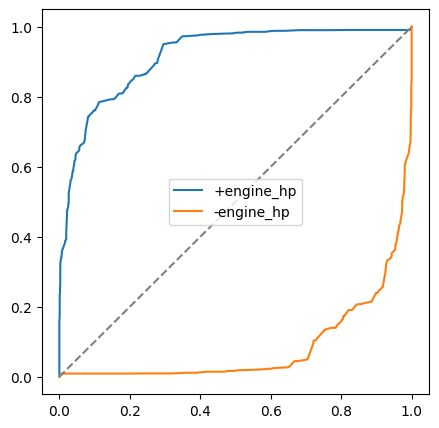

In [28]:
#@ PLOTTING THE ROC CURVE:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.engine_hp)
plt.plot(fpr, tpr, label='+engine_hp')

fpr, tpr, _ = roc_curve(y_train, -df_train.engine_hp)
plt.plot(fpr, tpr, label='-engine_hp')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

In [54]:
#@ TRAINING LOGISTIC REGRESSION MODEL:
columns =  numerical+ categorical
# find the df_train columns with the missing values:
# df_train.columns[df_train.isnull().any()]   
train_dicts = df_train[columns].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

# val_dicts = df_val[columns].to_dict(orient='records')
# X_val = dv.transform(val_dicts)

# y_pred = model.predict_proba(X_val)[:, 1]

ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [51]:
# X_train where missing values :
# number of record where NaN in X_train:
X_train[np.isnan(X_train)].sum()



nan

In [49]:
# drop the target variable from the dataset:
del df_train['above_average']
del df_val['above_average']
del df_test['above_average']


In [28]:
# categorical variables in the dataset:
# year	engine_hp	engine_cylinders	highway_mpg	city_mpg	price
categorical = ['make', 'model', 'transmission_type', 'vehicle_style']


In [29]:



#@ DEFINING FUNCTION:
def calculate_mi(series):
    return mutual_info_score(series, df_train.above_average)

#@ IMPLEMENTATION:
df_mi = df_train[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')
df_mi

,MI
model,0.460514
make,0.240114
vehicle_style,0.084334
transmission_type,0.021262


In [30]:
# Round the scores to 2 decimals using round(score, 2).
df_mi = df_mi.round(2)

In [31]:
df_mi

,MI
model,0.46
make,0.24
vehicle_style,0.08
transmission_type,0.02


In [32]:
df_train = df_train.drop('above_average', axis=1)
df_val = df_val.drop('above_average', axis=1)
df_test = df_test.drop('above_average', axis=1)

In [33]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg
0,Volkswagen,Beetle,2016,210.0,4.0,MANUAL,2dr Hatchback,31,23
1,Chevrolet,Camaro,2017,650.0,8.0,MANUAL,Convertible,20,14
2,Toyota,Sienna,2017,296.0,6.0,AUTOMATIC,Passenger Minivan,27,19
3,Hyundai,Equus,2014,429.0,8.0,AUTOMATIC,Sedan,23,15
4,Aston Martin,DB7,2003,420.0,12.0,MANUAL,Convertible,17,10


In [34]:
numerical=['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg']
train_dict = df_train[categorical + numerical].to_dict(orient='records')

#@ VECTORIZING THE DATASET:
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)
X_train = dv.transform(train_dict)

In [36]:
model = LogisticRegression(solver="liblinear", C=1.0, max_iter=1000, random_state=42)
model.fit(X_train, y_train)

#@ INITIALIZING THE MODEL PREDICTION:
val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)
y_pred = model.predict(X_val)

#@ INSPECTING THE ACCURACY:
accuracy = np.round(accuracy_score(y_val, y_pred),2)
print(accuracy)

0.94


In [37]:
features = categorical + numerical
features

['make',
 'model',
 'transmission_type',
 'vehicle_style',
 'year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg']

In [38]:
orig_score = accuracy

for c in features:
    subset = features.copy()
    subset.remove(c)
    
    train_dict = df_train[subset].to_dict(orient='records')

    dv = DictVectorizer(sparse=False)
    dv.fit(train_dict)

    X_train = dv.transform(train_dict)

    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000, random_state=42)
    model.fit(X_train, y_train)

    val_dict = df_val[subset].to_dict(orient='records')
    X_val = dv.transform(val_dict)

    y_pred = model.predict(X_val)

    score = accuracy_score(y_val, y_pred)
    print(c, orig_score - score, score)

make 0.02966963817514412 0.9103303618248558
model 0.02495018353434708 0.9150498164656529
transmission_type -0.004415312008390182 0.9444153120083901
vehicle_style 0.011316203460933316 0.9286837965390666
year -0.004939695857367643 0.9449396958573676
engine_hp 0.020755112742527504 0.9192448872574724
engine_cylinders -0.0002202412165706047 0.9402202412165706
highway_mpg -0.0017933927635029878 0.9417933927635029
city_mpg 0.00030414263240685635 0.9396958573675931


In [39]:
train_dict = df_train[categorical + numerical].to_dict(orient='records')
dv = DictVectorizer(sparse=False)
dv.fit(train_dict)

X_train = dv.transform(train_dict)

val_dict = df_val[categorical + numerical].to_dict(orient='records')
X_val = dv.transform(val_dict)

In [41]:
for a in [0, 0.01, 0.1, 1, 10]:
    model = Ridge(alpha=a, solver="sag", random_state=42)
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)
    
    score = np.sqrt(mean_squared_error(y_val, y_pred))
    
    print(a, round(score, 4))

c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.01 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


0.1 0.3008


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


1 0.3009
10 0.301


c:\Users\pc\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
